In [27]:
import pandas as pc
import numpy as np
from math import radians, cos, sin, asin, sqrt

In [28]:
def haversine (lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin (dlat/2)**2 + cos (lat1) * cos (lat2) * sin (dlon/2)**2
    c = 2 * asin (sqrt (a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [39]:
lat = data['Latitude'] #Latitude\n",
lon = data['Longitude'] #Longitude\n",

data['dist'] = np.zeros(lat.shape[0]) #create new column for distance
data['time_diff'] = np.zeros(lat.shape[0]) #create new column for time

for i in range(lat.shape[0]-1): #For-loop goes throught the data untill the second last row\n",
    data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)\n,
    data['time_diff'][i] = data['Time (s)'][i+1] - data['Time (s)'][i]  #The time step between data points with indices i ja i + 1 (in seconds)\n,

data['dist'][0] = 0
data['velocity'] = data['dist']/data['time_diff']

In [29]:
data = pc.read_csv ('Raw Data.csv')
data.head()

,Time (s),Latitude,Longitude,Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.590985,65.066689,25.490841,18.796145,36.280823,0.0,NaN,0.000006,5.360,6.0,12.0
1,1.579061,65.066690,25.490841,18.805910,36.290588,0.0,NaN,0.000009,5.360,6.0,16.0
2,2.580034,65.066690,25.490842,18.798708,36.283386,0.0,NaN,0.000010,6.432,6.0,15.0
3,3.580063,65.066690,25.490842,18.793276,36.277954,0.0,NaN,0.000011,7.504,6.0,11.0
4,4.576109,65.066690,25.490842,18.806643,36.291321,0.0,NaN,0.000013,11.792,6.0,10.0


In [30]:
import folium
location_frame = data[['Latitude', 'Longitude']] #create data frame with latitude and longitude
location_list = location_frame.values.tolist() #create list of the frame

ave_lat = np.mean(location_list, axis=0)[0] #calculate the average latitude
ave_lon = np.mean(location_list, axis=0)[1] #calculate the average longitude

# Load map centred on average coordinates
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

#add markers to the map
#for each in location_list:
#    folium.Marker(each).add_to(my_map)

#Drow lines of motion
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

my_map.save("Tomoko_map.html")
my_map




Text(0, 0.5, 'Satellites')

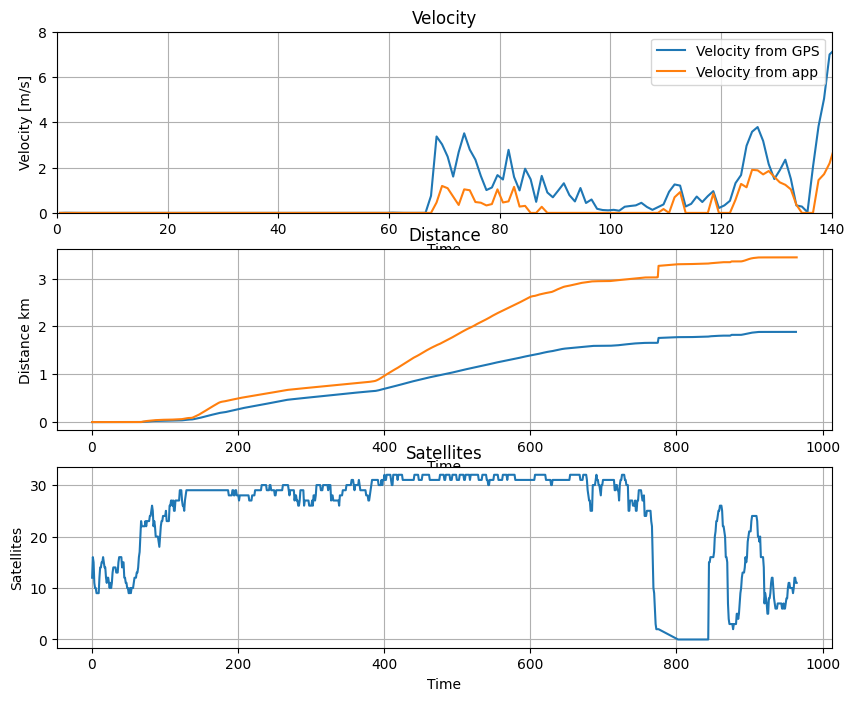

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(data['Time (s)'], data['velocity'])
plt.plot(data['Time (s)'], data['Speed (m/s)'])
plt.legend(['Velocity from GPS', 'Velocity from app'])
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity [m/s]')
plt.axis([0,140,0,8])

plt.subplot(3, 1, 2)#second panel
plt.plot(data['Time (s)'], data['Distance (km)'])
plt.plot(data['Time (s)'], np.cumsum(data['dist'])/1000)
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance km')

plt.subplot(3, 1, 3)#second panel
plt.plot(data['Time (s)'], data['Satellites'])
plt.grid()
plt.title('Satellites')
plt.xlabel('Time')
plt.ylabel('Satellites')


In [31]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
